# Foreign Born Population by Year of Entry

## Variables

In [1]:
%matplotlib inline
import os, requests, json, pandas as pd, matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas.io.formats.format as pf

# display numbers (floats) with thousand separator
pd.options.display.float_format = '{:,.1f}'.format

# found this hack to format integers for display with thousand separator
# https://stackoverflow.com/questions/29663252/format-pandas-integers-for-display?answertab=active#tab-top
class IntArrayFormatter(pf.GenericArrayFormatter):
    def _format_strings(self):
        formatter = self.formatter or '{:,d}'.format
        fmt_values = [formatter(x) for x in self.values]
        return fmt_values
pf.IntArrayFormatter = IntArrayFormatter

In [2]:
#Set variables
dir_path = os.getcwd()
out_path=os.path.join(dir_path,'output')

year='2018'
dsource='acs'
dsource2='acs5'
dname='subject'
state='36'
place='51000'
cbsa='35620'
keyfile='census_key.txt'

In [3]:
col_list=['NAME',
          'S0501_C01_001E','S0501_C01_001M',
          'S0502_C01_001E','S0502_C01_001M',
          'S0502_C02_001E','S0502_C02_001M',
          'S0502_C02_004E','S0502_C02_004M', 
          'S0502_C02_005E','S0502_C02_005M',
          'S0502_C02_006E','S0502_C02_006M',
          'S0502_C02_007E','S0502_C02_007M',
          'S0502_C02_008E','S0502_C02_008M',
          'S0502_C02_009E','S0502_C02_009M',
          'S0502_C02_010E','S0502_C02_010M',
          ]
cols=','.join(col_list)
cols

'NAME,S0501_C01_001E,S0501_C01_001M,S0502_C01_001E,S0502_C01_001M,S0502_C02_001E,S0502_C02_001M,S0502_C02_004E,S0502_C02_004M,S0502_C02_005E,S0502_C02_005M,S0502_C02_006E,S0502_C02_006M,S0502_C02_007E,S0502_C02_007M,S0502_C02_008E,S0502_C02_008M,S0502_C02_009E,S0502_C02_009M,S0502_C02_010E,S0502_C02_010M'

In [4]:
vars_url=f'https://api.census.gov/data/{year}/{dsource}/{dsource2}/{dname}/variables.json'
response=requests.get(vars_url)

#"variables" is top key in the file - reference it to flatten the file so individual variables become keys 
variables=response.json()['variables']
variables

{'for': {'label': "Census API FIPS 'for' clause",
  'concept': 'Census API Geography Specification',
  'predicateType': 'fips-for',
  'group': 'N/A',
  'limit': 0,
  'predicateOnly': True},
 'in': {'label': "Census API FIPS 'in' clause",
  'concept': 'Census API Geography Specification',
  'predicateType': 'fips-in',
  'group': 'N/A',
  'limit': 0,
  'predicateOnly': True},
 'ucgid': {'label': 'Uniform Census Geography Identifier clause',
  'concept': 'Census API Geography Specification',
  'predicateType': 'ucgid',
  'group': 'N/A',
  'limit': 0,
  'predicateOnly': True},
 'S0804_C04_068E': {'label': 'Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over who did not work at home!!TIME ARRIVING AT WORK FROM HOME!!5 00 a.m. to 5 29 a.m.',
  'concept': 'MEANS OF TRANSPORTATION TO WORK BY SELECTED CHARACTERISTICS FOR WORKPLACE GEOGRAPHY',
  'predicateType': 'float',
  'group': 'S0804',
  'limit': 0,
  'attributes': 'S0804_C04_068M,S0804_C04_068MA,S0804_C04_068EA'}

In [5]:
#Iterate through keys and get specific sub-values
varnames={}
for k,v in variables.items():
    if k in cols:
        varnames[k]=v['label']

sorted_vars = sorted(varnames.items())
sorted_vars

[('S0501_C01_001E', 'Estimate!!Total!!Total population'),
 ('S0502_C01_001E', 'Estimate!!Total!!Foreign-born population'),
 ('S0502_C02_001E',
  'Estimate!!Foreign born; Entered 2010 or later!!Foreign-born population'),
 ('S0502_C02_004E',
  'Estimate!!Foreign born; Entered 2010 or later!!Foreign-born population!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population excluding population born at sea'),
 ('S0502_C02_005E',
  'Estimate!!Foreign born; Entered 2010 or later!!Foreign-born population!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Europe'),
 ('S0502_C02_006E',
  'Estimate!!Foreign born; Entered 2010 or later!!Foreign-born population!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Asia'),
 ('S0502_C02_007E',
  'Estimate!!Foreign born; Entered 2010 or later!!Foreign-born population!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Africa'),
 ('S0502_C02_008E',
  'Estimate!!Foreign born; Entered 2010 or later!!Foreign-born population!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Oceania'),
 ('S0502_C0

## Retrieve Data

In [6]:
base_url = f'https://api.census.gov/data/{year}/{dsource}/{dsource2}/{dname}'
base_url

'https://api.census.gov/data/2018/acs/acs5/subject'

In [7]:
#Read api key in from file
with open(keyfile) as key:
    api_key=key.read().strip()

In [8]:
# NYC
data_url = f'{base_url}?get={cols}&for=place:{place}&in=state:{state}&key={api_key}'
response=requests.get(data_url)
nycdata=response.json()
print('List has', len(nycdata), 'records')

List has 2 records


In [9]:
df1=pd.DataFrame(nycdata[1:], columns=nycdata[0])
df1.set_index('NAME',inplace=True)
df1.drop(columns=['state','place'],inplace=True)
df1

,S0501_C01_001E,S0501_C01_001M,S0502_C01_001E,S0502_C01_001M,S0502_C02_001E,S0502_C02_001M,S0502_C02_004E,S0502_C02_004M,S0502_C02_005E,S0502_C02_005M,S0502_C02_006E,S0502_C02_006M,S0502_C02_007E,S0502_C02_007M,S0502_C02_008E,S0502_C02_008M,S0502_C02_009E,S0502_C02_009M,S0502_C02_010E,S0502_C02_010M
NAME,,,,,,,,,,,,,,,,,,,,
"New York city, New York",8443713,-555555555,3127289,13304,538033,7289,538033,7289,13.3,0.4,37.5,0.7,6.4,0.4,1.1,0.1,40.3,0.7,1.4,0.2


In [10]:
# NYMA
data_url = f'{base_url}?get={cols}&for=metropolitan statistical area/micropolitan statistical area:{cbsa}&key={api_key}'
response=requests.get(data_url)
nymadata=response.json()
print('List has', len(nymadata), 'records')

List has 2 records


In [11]:
df2=pd.DataFrame(nymadata[1:], columns=nymadata[0])
df2.set_index('NAME',inplace=True)
df2.drop(columns=['metropolitan statistical area/micropolitan statistical area'],inplace=True)
df2

,S0501_C01_001E,S0501_C01_001M,S0502_C01_001E,S0502_C01_001M,S0502_C02_001E,S0502_C02_001M,S0502_C02_004E,S0502_C02_004M,S0502_C02_005E,S0502_C02_005M,S0502_C02_006E,S0502_C02_006M,S0502_C02_007E,S0502_C02_007M,S0502_C02_008E,S0502_C02_008M,S0502_C02_009E,S0502_C02_009M,S0502_C02_010E,S0502_C02_010M
NAME,,,,,,,,,,,,,,,,,,,,
"New York-Newark-Jersey City, NY-NJ-PA Metro Area",19990592,-555555555,5761610,20062,951860,9737,951860,9737,11.1,0.3,37.6,0.5,6.5,0.3,0.7,0.1,43.0,0.6,1.2,0.1


In [12]:
# USA
data_url = f'{base_url}?get={cols}&for=us:1&key={api_key}'
response=requests.get(data_url)
usdata=response.json()
print('List has', len(usdata), 'records')

List has 2 records


In [13]:
df3=pd.DataFrame(usdata[1:], columns=usdata[0])
df3.set_index('NAME',inplace=True)
df3.drop(columns=['us'],inplace=True)
df3

,S0501_C01_001E,S0501_C01_001M,S0502_C01_001E,S0502_C01_001M,S0502_C02_001E,S0502_C02_001M,S0502_C02_004E,S0502_C02_004M,S0502_C02_005E,S0502_C02_005M,S0502_C02_006E,S0502_C02_006M,S0502_C02_007E,S0502_C02_007M,S0502_C02_008E,S0502_C02_008M,S0502_C02_009E,S0502_C02_009M,S0502_C02_010E,S0502_C02_010M
NAME,,,,,,,,,,,,,,,,,,,,
United States,322903030,-555555555,43539499,131250,7904024,47211,7903748,47209,8.7,0.1,42.0,0.2,8.3,0.1,0.9,0.1,38.2,0.2,2.0,0.1


In [14]:
places = pd.concat([df1,df2,df3])
places = places.apply(pd.to_numeric)
places.index=['New York City','New York Metro Area','United States']
places

,S0501_C01_001E,S0501_C01_001M,S0502_C01_001E,S0502_C01_001M,S0502_C02_001E,S0502_C02_001M,S0502_C02_004E,S0502_C02_004M,S0502_C02_005E,S0502_C02_005M,S0502_C02_006E,S0502_C02_006M,S0502_C02_007E,S0502_C02_007M,S0502_C02_008E,S0502_C02_008M,S0502_C02_009E,S0502_C02_009M,S0502_C02_010E,S0502_C02_010M
New York City,"8,443,713","-555,555,555","3,127,289","13,304","538,033","7,289","538,033","7,289",13.3,0.4,37.5,0.7,6.4,0.4,1.1,0.1,40.3,0.7,1.4,0.2
New York Metro Area,"19,990,592","-555,555,555","5,761,610","20,062","951,860","9,737","951,860","9,737",11.1,0.3,37.6,0.5,6.5,0.3,0.7,0.1,43.0,0.6,1.2,0.1
United States,"322,903,030","-555,555,555","43,539,499","131,250","7,904,024","47,211","7,903,748","47,209",8.7,0.1,42.0,0.2,8.3,0.1,0.9,0.1,38.2,0.2,2.0,0.1


## Analysis and Charts

In [15]:
pct_fb=round((places['S0502_C01_001E']/places['S0501_C01_001E'])*100,1)
pct_fb

New York City         37.0
New York Metro Area   28.8
United States         13.5
dtype: float64

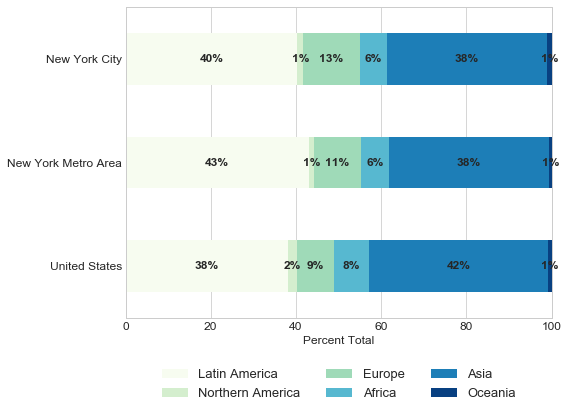

In [18]:
regions=['S0502_C02_009E','S0502_C02_010E','S0502_C02_005E','S0502_C02_007E','S0502_C02_006E','S0502_C02_008E']
ax=places[regions].plot(kind='barh',stacked=True, figsize=(8,5), cmap='GnBu')
ax.invert_yaxis()
leg_names=['Latin America','Northern America','Europe','Africa','Asia','Oceania']
lgd=plt.legend(leg_names, loc=8,bbox_to_anchor=(0.5, -0.3), ncol=3, prop = {'size':13},frameon=False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontweight='bold', fontsize=12)

ax.set_xlim(0,100)
ax.set_xlabel("Percent Total", fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.tight_layout()

fig_for=ax.get_figure()
fig_for.savefig(os.path.join(out_path, 'images','foreign_origins.png'),bbox_inches='tight')
